In [2]:
# import libraries:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tweepy 
import json

## Gathering Data:
we have to import three data files:
- twitter_archive_anhanced.csv
- image-predictions.tsv
- tweet_json.txt

In [2]:
# import twitter_archive_anhanced file:
#Read CSV file.. 
t_ar = pd.read_csv('twitter_archive_enhanced.csv')
t_ar.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
t_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#import image-predictions: read file online
#tsv file is a text file spreated by space..
img_url=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', sep='\t')
img_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
img_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# import tweet_json file:
#convert json to dataframe..
df_list = []
with open('tweet_json.txt', 'r') as file:
    for j in file:
        data = json.loads(j)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': data['id'],
                        #'user_name':data['user']['name'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        #'text': data['full_text'],
                        #'location':data['user']['location']
                        
                       })

# Create a DataFrame 
data_df = pd.DataFrame(df_list, columns = ['tweet_id' ,'retweet_count', 'favorite_count'])
data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
print(type(data),data.keys())

<class 'dict'> dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data:

In [11]:

#t_ar.sample(20)
#t_ar.text[2]
t_ar.name.value_counts()
#t_ar.rating_denminator.value_counts()
#t_ar.rating_nenminator.value_counts()
#sum(t_ar.tweet_id.duplicated())




None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
Bailey          7
Daisy           7
an              7
Toby            7
Bella           6
Stanley         6
Jack            6
Leo             6
Dave            6
Scout           6
Koda            6
Jax             6
Milo            6
Oscar           6
Rusty           6
George          5
             ... 
Petrick         1
Darby           1
Jackie          1
Nico            1
Hermione        1
Ridley          1
Pete            1
Tebow           1
Pip             1
Chevy           1
Blakely         1
Timmy           1
Barney          1
Boots           1
Mojo            1
Stewie          1
DonDon          1
Tove            1
Cannon          1
Chesterson      1
Roscoe          1
Kingsley        1
Arya            1
Brownie         1
Mosby     

In [12]:
#sum(img_url. jpg_url.duplicated())
#img_url.isnull().sum()
#img_url.jpg_url.duplicated().sum()

### Quality
#(Twitter archive) table
- some rows are Retweets  
- wrong datatypes of columns: tweet_id, in_reply_to_status_id, in_reply_to_user_id and timestamp
- rating_numerator column has values less than 10 and large numbers such as 1176!
- rating_denominator column has values other than 10
- name column has an invalid dog names! such as: the, a, an, officially, old, one, quite
- text column: some contains url.
- missing values in some columns.
- source column contains tag



#image_predication:  
- wrong datatype of tweet_id column.
- jpg_url colume has some diplicated.
- missing values in some columns. 
- p1, p2, p3 coulmns contain underscores of names/labels
- p1, p2, p3 all get false prediction



#json file:
- wrong datatype of tweet_id column.



### Tidniess:

- dog stage sprates in many columns!
- data sparates in three different dataframes


## cleaning data:
consist three steps:
- dfine:
- code:
- test:

In [13]:
#copy dataframes:
t_ar_clean=t_ar.copy()
img_url_clean=img_url.copy()
data_df_clean=data_df.copy()


In [14]:
t_ar_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# define: remove retweets:
t_ar_clean['retweeted_status_id'].notnull().sum()

181

In [16]:
# code:
t_ar_clean=t_ar_clean[t_ar_clean['retweeted_status_id'].isnull()]
# test:
t_ar_clean['retweeted_status_id'].notnull().sum()
#t_ar_clean.shape[0]

0

In [17]:
# define: remove rating_numerator column that has value less than 10 or more than 14:
print(t_ar_clean.rating_numerator.min(),t_ar_clean.rating_numerator.max())


0 1776


In [18]:
# code:
t_ar_clean=t_ar_clean[t_ar_clean.rating_numerator.between(10,14)]
# test:
print(t_ar_clean.rating_numerator.min(),t_ar_clean.rating_numerator.max())


10 14


In [19]:
# define: change rating_denominator to be 10
t_ar_clean.rating_denominator.value_counts()


10    1717
15       1
Name: rating_denominator, dtype: int64

In [20]:
# code:
t_ar_clean['rating_denominator']=10
# test:
t_ar_clean.rating_denominator.value_counts()


10    1718
Name: rating_denominator, dtype: int64

In [21]:
# define: dog name column contain invalid name such as [a,an,my,his,the,such,old] 
t_ar_clean.name.value_counts()

None           521
a               29
Charlie         11
Lucy            10
Cooper           9
Oliver           9
Tucker           8
Winston          7
Sadie            7
Penny            7
Bo               6
Koda             6
Lola             6
Daisy            6
Leo              5
Bailey           5
Stanley          5
the              5
Milo             5
Louis            5
Oscar            5
Toby             5
Jax              5
Bentley          5
Oakley           4
Finn             4
Reggie           4
Winnie           4
Scooter          4
Derek            4
              ... 
Gòrdón           1
Kyro             1
infuriating      1
Zuzu             1
Hunter           1
Koko             1
Mo               1
Coops            1
Sojourner        1
Leela            1
DonDon           1
Chevy            1
Timmy            1
Barney           1
Boots            1
Hercules         1
Mojo             1
Stewie           1
Klein            1
Tove             1
Ronduh           1
Cannon      

In [22]:
# code: remove invalied name ['a','an','my','his','the','such','old']
index=['a','an','my','his','the','such','old','None']
for i in index:
    t_ar_clean=t_ar_clean[t_ar_clean.name != i ]
    
    
# test:
t_ar_clean.name.value_counts()

Charlie        11
Lucy           10
Oliver          9
Cooper          9
Tucker          8
Winston         7
Penny           7
Sadie           7
Koda            6
Bo              6
Daisy           6
Lola            6
Leo             5
Oscar           5
Stanley         5
Milo            5
Jax             5
Toby            5
Louis           5
Bailey          5
Bentley         5
Bella           4
Scout           4
Cassie          4
Bear            4
Archie          4
Winnie          4
Reggie          4
Rusty           4
Oakley          4
               ..
Stu             1
Betty           1
Goose           1
Jerome          1
Ivar            1
Gòrdón          1
Kyro            1
infuriating     1
Mason           1
Ulysses         1
Mosby           1
Brownie         1
Ambrose         1
Lucia           1
Perry           1
Leela           1
Chevy           1
Timmy           1
Barney          1
Boots           1
Hercules        1
Mojo            1
Stewie          1
Klein           1
Tove      

In [23]:
#define: merge columns [doggo,floofer,pupper,puppo] to one column


In [26]:
#code:
i=["doggo","floofer","pupper","puppo"]

t_ar_clean['dog_stage']=t_ar_clean[i[0]]+ ''+t_ar_clean[i[1]]+''+t_ar_clean[i[2]]+''+t_ar_clean[i[3]]
t_ar_clean['dog_stage']=t_ar_clean['dog_stage'].str.replace('None','')
#t_ar_clean['dog_stage']=t_ar_clean.doggo.str.cat(t_ar_clean.floofer,na_rep='').str.cat(t_ar_clean.pupper,na_rep='').str.cat(t_ar_clean.puppo,na_rep='')
t_ar_clean['dog_stage']=t_ar_clean['dog_stage'].str.replace('doggo','doggo,')

t_ar_clean['dog_stage1'],t_ar_clean['dog_stage2']=t_ar_clean['dog_stage'].str.split(',').str
t_ar_clean['dog_stage1']=t_ar_clean['dog_stage1'].replace('','None')
t_ar_clean['dog_stage2']=t_ar_clean['dog_stage2'].replace('','None')

#test:
t_ar_clean.dog_stage1.value_counts()
#t_ar_clean.dog_stage.isnull().sum()

#t_ar_clean

None       999
pupper      96
doggo       42
puppo       15
floofer      5
Name: dog_stage1, dtype: int64

In [28]:
# deifne: remove tags from source column:

t_ar_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1097
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       11
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

In [29]:
#code:
t_ar_clean['source'] = t_ar_clean['source'].str.extract('^<a.+>(.+)</a>$')
#test:
t_ar_clean.source.sample()

685    Twitter for iPhone
Name: source, dtype: object

In [30]:
#define: remove all predication are getting false
con= "p1_dog == False and p2_dog == False and p3_dog == False"  
len(img_url_clean.query(con).index)


324

In [31]:
#code:
img_url_clean.drop(img_url_clean.query(con).index,inplace=True)
#test:
len(img_url_clean.query(con).index)

0

In [33]:
img_url_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1422,772114945936949249,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Chihuahua,0.803293,True,toy_terrier,0.052980,True,Italian_greyhound,0.037239,True
861,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False


In [45]:
#define: clean up text name from - for p1,p2,p3 coulmns
img_url_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [51]:
#code:
img_url_clean.p1=img_url_clean.p1.str.replace('_',' ')
img_url_clean.p2=img_url_clean.p2.str.replace('_',' ')
img_url_clean.p3=img_url_clean.p3.str.replace('_',' ')



#test:
img_url_clean.p1.head()

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
Name: p1, dtype: object

In [61]:
#merge dataframes togather 
df0=pd.merge(t_ar_clean,img_url_clean,on='tweet_id')
df=pd.merge(df0,data_df_clean,on='tweet_id')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False,2158,12041


In [62]:
#drop unwanted columns
df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',"doggo","floofer","pupper","puppo",'dog_stage'],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1018
Data columns (total 22 columns):
tweet_id              1019 non-null int64
timestamp             1019 non-null object
source                1019 non-null object
text                  1019 non-null object
rating_numerator      1019 non-null int64
rating_denominator    1019 non-null int64
name                  1019 non-null object
dog_stage1            1019 non-null object
dog_stage2            36 non-null object
jpg_url               1019 non-null object
img_num               1019 non-null int64
p1                    1019 non-null object
p1_conf               1019 non-null float64
p1_dog                1019 non-null bool
p2                    1019 non-null object
p2_conf               1019 non-null float64
p2_dog                1019 non-null bool
p3                    1019 non-null object
p3_conf               1019 non-null float64
p3_dog                1019 non-null bool
retweet_count         1019 non-null int64


In [64]:
#export dataframe as csv file
df.to_csv('twitter_archive_clean.csv', index=False)

# Visualizing Data

In [3]:
df=pd.read_csv('twitter_archive_clean.csv')
df.timestamp=pd.to_datetime(df.timestamp)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 22 columns):
tweet_id              1019 non-null int64
timestamp             1019 non-null datetime64[ns]
source                1019 non-null object
text                  1019 non-null object
rating_numerator      1019 non-null int64
rating_denominator    1019 non-null int64
name                  1019 non-null object
dog_stage1            1019 non-null object
dog_stage2            36 non-null object
jpg_url               1019 non-null object
img_num               1019 non-null int64
p1                    1019 non-null object
p1_conf               1019 non-null float64
p1_dog                1019 non-null bool
p2                    1019 non-null object
p2_conf               1019 non-null float64
p2_dog                1019 non-null bool
p3                    1019 non-null object
p3_conf               1019 non-null float64
p3_dog                1019 non-null bool
retweet_count         1019 non-nul

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage1,dog_stage2,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False,2158,12041


In [9]:
df.timestamp.dt.to_period('M').value_counts()

2015-12    118
2015-11     87
2016-01     69
2016-03     65
2016-10     56
2017-02     53
2016-07     52
2017-01     47
2016-02     46
2016-08     43
2016-12     42
2016-09     40
2016-11     38
2017-03     38
2016-06     37
2017-07     36
2016-04     34
2017-06     33
2016-05     32
2017-05     28
2017-04     24
2017-08      1
Freq: M, Name: timestamp, dtype: int64

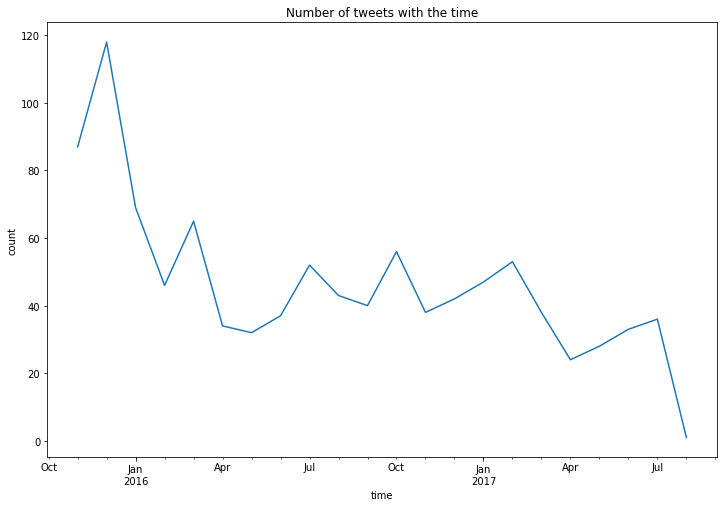

In [8]:
#tweeting time line:
df.groupby(df.timestamp.dt.to_period('M'))['tweet_id'].count().plot(figsize=(12,8))
plt.xlabel("time")
plt.ylabel("count")
plt.title('Number of tweets with the time');
plt.savefig('timline.png')


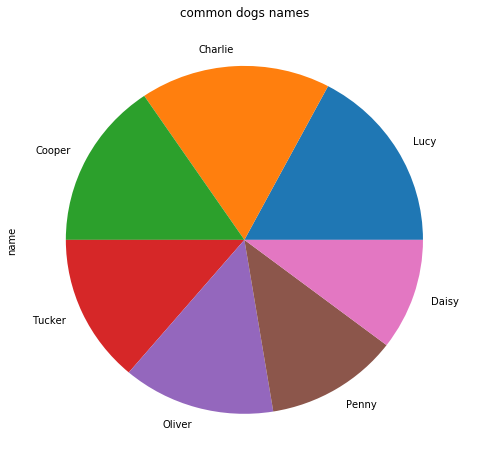

In [11]:
#common dogs names:
df.name.value_counts().head(7).plot.pie(figsize=(8,8))
plt.title('common dogs names');
plt.savefig('common dogs names.png')


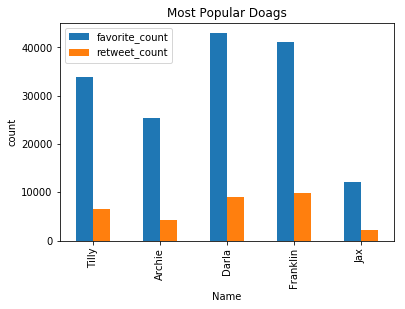

In [12]:
#most popular dogs
df.head().plot.bar(x="name",y=["favorite_count",'retweet_count'])
plt.xlabel("Name")
plt.ylabel("count")
plt.title('Most Popular Doags');
plt.savefig('Most Popular Doags.png')
